## Oppgave 2 a)

[128 105 118 102 117 116 110 124 103 106 107 119  99 134 112 125 126 110
 108 121 133 129 111 115 119  99 126 118  92 116 128 148 134 133 145 142
 137 138 139 145 135 137 138 145 135 148 164 154 148 162 146 123 159 156
 165 169 170 150 129 156 183 184 150 159 174 163 171 177 184 174 165 165
 166 175 181 190 184 152 167 176 203 187 195 172 209 194 183 188 188 208
 188 196 206 193 191 208 224 213 206 197 198]


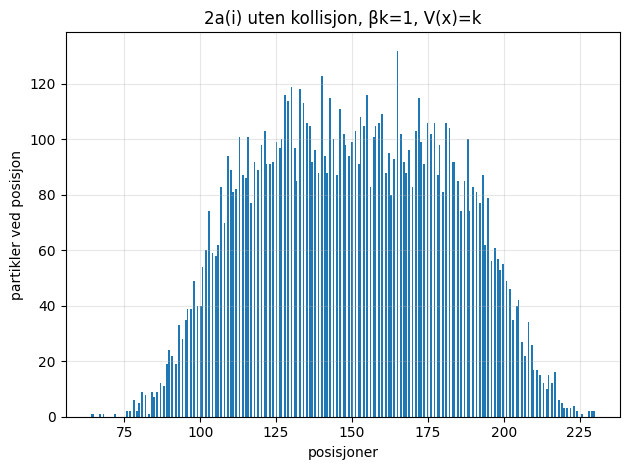

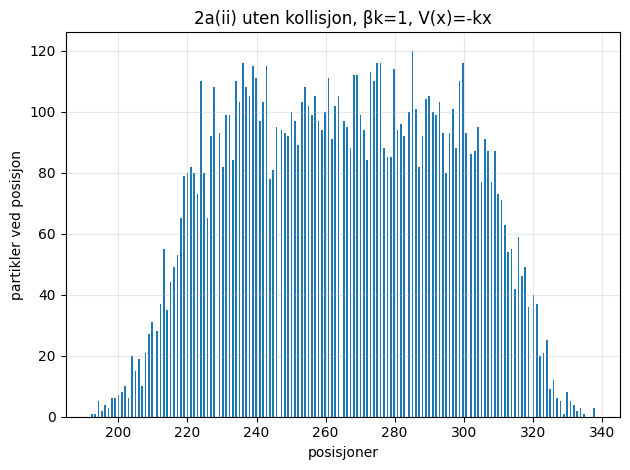

In [220]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
kb = 1.38 * 10**-23
T = 298
beta = 1/(kb*T)

@njit
def V21(x):
    return 1/beta

@njit
def V22(x):
    return -x/beta

@njit
def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0


@njit
def sannsynligheter(beta,V,x):
    pPluss = 1/(1+np.exp(-beta*(V(x-1)-V(x+1)))+np.exp(-beta*(V(x)-V(x+1))))
    pMinus = 1/(1+np.exp(-beta*(V(x+1)-V(x-1)))+np.exp(-beta*(V(x)-V(x-1))))
    return pMinus, pPluss

@njit
def simulasjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            posisjoner[j]+=skritt
    return posisjoner

def plotGjennomsnitt(steg, beta, V, antallPartikler, mellomrom, antallSimulasjoner, simulasjon,label):
    posisjonerArray = np.array([simulasjon(steg, beta, V, antallPartikler, mellomrom) for _ in range(antallSimulasjoner)])
    posisjonerArray = posisjonerArray.flatten()
    numberArray = np.array([0 for _ in range(200+(antallPartikler-1)*(mellomrom+1)+1)])
    for i in range(len(numberArray)):
        numberArray[i]=(posisjonerArray==i).sum()
    plt.hist(posisjonerArray,bins=300,label=label)
    return

print(simulasjon(200,beta,V21,101,0))
plotGjennomsnitt(200,beta,V21,101,0,100,simulasjon,"")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2a(i) uten kollisjon, βk=1, V(x)=k")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plotGjennomsnitt(200,beta,V22,101,0,100,simulasjon,"")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2a(ii) uten kollisjon, βk=1, V(x)=-kx")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Oppgave 2 b)

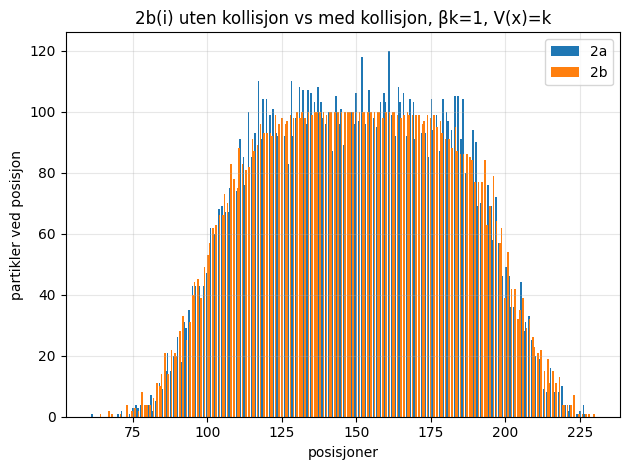

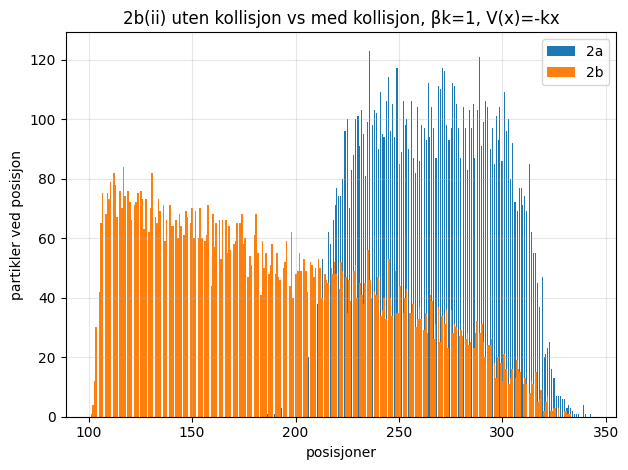

In [221]:
@njit
def simulasjonKollisjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            if not ((posisjoner[j] + skritt) in posisjoner):
                posisjoner[j]+=skritt
    return posisjoner

plotGjennomsnitt(200,beta,V21,101,0,100,simulasjon,"2a")
plotGjennomsnitt(200,beta,V21,101,0,100,simulasjonKollisjon,"2b")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2b(i) uten kollisjon vs med kollisjon, βk=1, V(x)=k")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plotGjennomsnitt(200,beta,V22,101,0,100,simulasjon,"2a")
plotGjennomsnitt(200,beta,V22,101,0,100,simulasjonKollisjon,"2b")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2b(ii) uten kollisjon vs med kollisjon, βk=1, V(x)=-kx")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Oppgave 2 c)

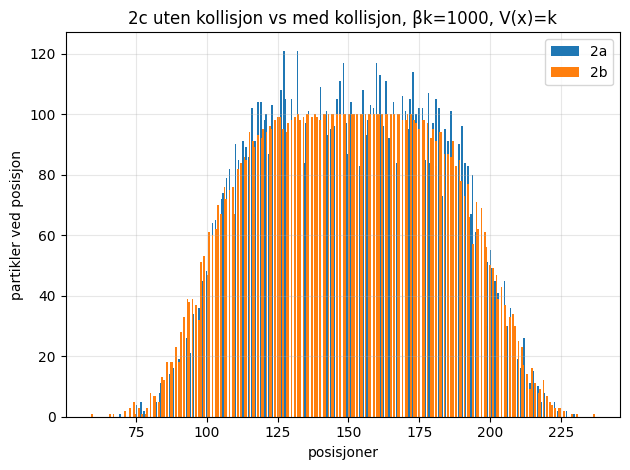

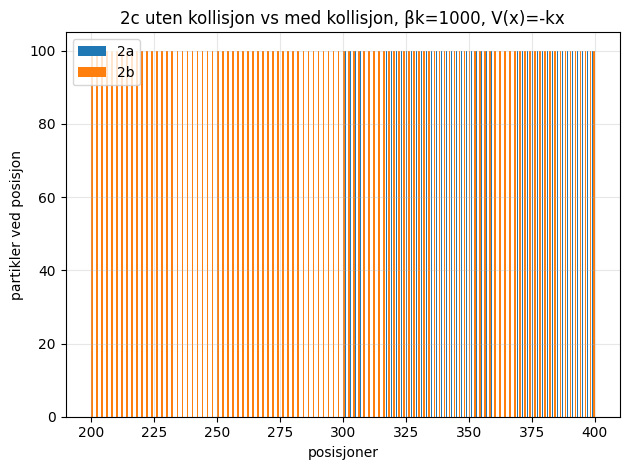

In [227]:
@njit
def V21_1000(x):
    return 1000/beta
@njit
def V22_1000(x):
    return -x*1000/beta

plotGjennomsnitt(200,beta,V21_1000,101,0,100,simulasjon,"2a")
plotGjennomsnitt(200,beta,V21_1000,101,0,100,simulasjonKollisjon,"2b")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2c uten kollisjon vs med kollisjon, βk=1000, V(x)=k")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plotGjennomsnitt(200,beta,V22_1000,101,0,100,simulasjon,"2a")
plotGjennomsnitt(200,beta,V22_1000,101,0,100,simulasjonKollisjon,"2b")
plt.xlabel("posisjoner")
plt.ylabel("partikler ved posisjon")
plt.title("2c uten kollisjon vs med kollisjon, βk=1000, V(x)=-kx")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Oppgave 3 a)

In [228]:
#import math as math


@njit
def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0

@njit
def V31(x,N_x,alpha,k):
    xPeriodisk = x % N_x
    if xPeriodisk < alpha*N_x:
        return k*xPeriodisk/(alpha*N_x*beta)
    else:
        xPeriodisk = xPeriodisk-N_x
        return -k*xPeriodisk/((1-alpha)*N_x*beta)


@njit
def V32(x,N_x,alpha,k):
    return 1/beta

@njit
def sannsynligheter3(beta,V,x,N_x,alpha,k,t,T_p):
    a = -beta * (periodiskPotensial(t,T_p,x-1,N_x,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    b = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    c = -beta * (periodiskPotensial(t,T_p,x+1,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))
    d = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))

    if a>50:
        a=50
    elif a<-50:
        a=-50
    if b>50:
        b=50
    elif b<-50:
        b=-50
    if c>50:
        c=50
    elif c<-50:
        c=-50
    if d>50:
        d=50
    elif d<-50:
        d=-50
    
    pPluss = 1.0 / (1.0 + np.exp(a) + np.exp(b))
    pMinus = 1.0 / (1.0 + np.exp(c) + np.exp(d))

    return pMinus, pPluss
@njit
def periodiskPotensial(t,T_p,x,N_x,alpha,k):
    if t % (2*T_p) < T_p:
        return V32(x,N_x,alpha,k)
    else:
        return V31(x,N_x,alpha,k)

@njit
def walkStep(N_x,alpha,k,N_p,t,T_p,X,intervall):
    nPluss = 0
    nMinus = 0
    for j in range(len(X)):
            pMinus, pPluss = sannsynligheter3(beta,periodiskPotensial,X[j],N_x,alpha,k,t,T_p)
            skritt =  walkDirection(pMinus,pPluss)

            if skritt==1:
                nPluss +=1
                if X[j]==intervall:
                    X[j] = 0
                else: 
                    X[j]+=skritt
            elif skritt==-1:
                nMinus +=1
                if X[j]==0:
                    X[j] = intervall
                else: 
                    X[j]+=skritt

    return X, (nPluss-nMinus)/N_p

def Simulasjon3(T_p,N_x,alpha,k,N_p,cycles,intervall):
    X=np.array([[i for _ in range ((N_p//intervall))] for i in range(N_p//(N_p//intervall))]).flatten() # lager en N_p stor array med hver siffer fra og med 0 til og med intervall N_p//intervall ganger på rad
    normalisertPartikkelFlytGjennomsnittArray = np.zeros(cycles)
    for cycle in range(cycles):
        normalisertPartikkelFlytArray = np.zeros(2*T_p)
        for t in range(2*T_p):
            X, normalisertPartikkelFlyt = walkStep(N_x,alpha,k,N_p,t,T_p,X,intervall)
            normalisertPartikkelFlytArray[t] = (normalisertPartikkelFlyt)
        normalisertPartikkelFlytGjennomsnitt = normalisertPartikkelFlytArray.sum()/(2*T_p)
        normalisertPartikkelFlytGjennomsnittArray[cycle] = normalisertPartikkelFlytGjennomsnitt
    return X, normalisertPartikkelFlytGjennomsnittArray

X_10, normalisertPartikkelFlytGjennomsnittArray_08 = Simulasjon3(500,100,0.8,1000,1200,10,200)
X_10, normalisertPartikkelFlytGjennomsnittArray_01 = Simulasjon3(500,100,0.1,1000,1200,10,200)




In [229]:
print(normalisertPartikkelFlytGjennomsnittArray_08)
print(normalisertPartikkelFlytGjennomsnittArray_01)


[-0.02999667 -0.0137375  -0.01339833 -0.01463583 -0.01219583 -0.01245583
 -0.01339833 -0.014905   -0.0112     -0.01226083]
[0.03875917 0.027245   0.02555417 0.02972667 0.0283075  0.0265525
 0.02891167 0.0282875  0.02865917 0.028045  ]


### i)
Vi får ikke-null partikkelstrømmer fordi potensial 1 har en positiv derivert for 80% av tall linjen, mot de 20%ene som er dekt av den negative deriverte. Selvom vi gjennom en hel syklus i posisjoner for potensial 1 går fra minimum til maksimum tilbake til minimum, vil vi fortsatt ha flere partikler som beveger seg til venstre for hver iterasjon da sum av skritt ikke er direkte proposjonal med magnitude av gradienten til potensialet ganget med område den dekker.

Fysiskt kan dette forklares med at vi har et område delt inn i mange seksjoner på en meter, der vi kan forskyve inndelingene litt for å få en potensialfunskjon med en dal i hver inndeling der vi starter på -0.2 meter og går til 0.8 osv gjennom område. Her vil potensialet være like maksimalt for -0.2 og 0.8 meter, og gå lineært ned mot minmium ved 0 meter. For å oppnå lavest potensiell energi vil alle partiklene bevege seg til posisjonen ved 0 meter, her kan vi se at hvis partiklene orginalt er jevnt fordelt vil flere partikler gå mot venstre enn høyre, som resulterer i en negativ gjennomsnittlig partikkelflyt.


### ii)
Vi ser at den første målingen av den gjennomsnittlige partikkelfyten er betydelig større enn alle de andre målingene som er relatvit like. Dette an forklares ved at partiklene orginalt er jevt fordelt for å så bevege seg slik at de i praksis alle er ved minimalt potensial under potensial 1, deretter byttes potensialet til potensial 2 som er konstant, og fører til tilfeldig bevegelse, på grunn av at denne tilfeldige bevegelsen skjer i en veldig begrenset tidsperiode, og at partiklene i utgangspunktet alle er veldig nær posisjon 0, forventer vi at de er betydelig nærmere posisjon 0 enn når de var jevnt fordelte ved tidspunktet der vi bytter tilbake til potensial 1. Dette gjør at vi får mindre bevegelse og derfor mindre gjennomsnittlig partikkelflyt.


### iii)
Her ser vi at den gjennomsnittlige partikkelflyten er mot høyre isteden for venstre som vi forventer da potensial 1 nå har mye større del med negativ derivert enn positiv derivert. 



Oppgave 3 b)

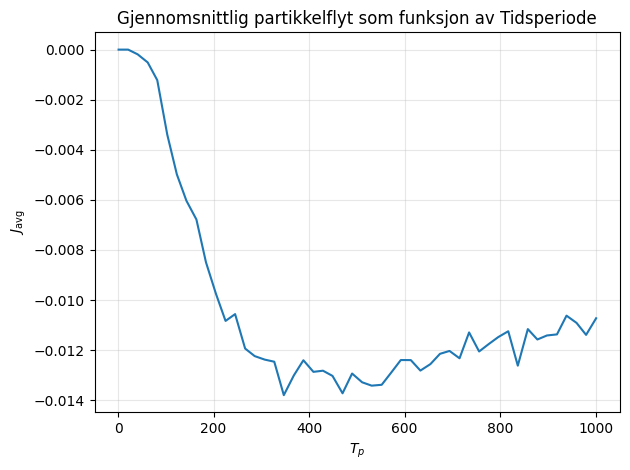

In [230]:

def Simulasjon3b(T_p,N_x,alpha,k,N_p,cycles,pos1,pos2,intervall):
    X=np.array([[pos1 for _ in range(N_p//2)],[pos2 for _ in range(N_p//2)]]).flatten()
    normalisertPartikkelFlytArray = np.zeros(2*T_p)
    for t in range(2*T_p):
        X, normalisertPartikkelFlyt = walkStep(N_x,alpha,k,N_p,t,T_p,X,intervall)
        normalisertPartikkelFlytArray[t] = (normalisertPartikkelFlyt)
    normalisertPartikkelFlytGjennomsnitt = normalisertPartikkelFlytArray.sum()/(2*T_p)
    return X, normalisertPartikkelFlytGjennomsnitt


T_pArray = np.int64(np.linspace(1,1001,50))

flytArray_3b = np.zeros(len(T_pArray),dtype=np.float64)
#test = []
for i in range (len(T_pArray)):
    X, normalisertPartikkelFlytGjennomsnittArray_3b = Simulasjon3b(T_pArray[i],100,0.8,1000,40*100,1,100,200,300)
    #test.append((X.sum()-600000)/(40*100*2*T_pArray[i]))
    flytArray_3b[i] = normalisertPartikkelFlytGjennomsnittArray_3b

plt.plot(T_pArray,flytArray_3b)
plt.xlabel(r"$T_p$")
plt.ylabel(r"$J_{\mathrm{avg}}$")
plt.title("Gjennomsnittlig partikkelflyt som funksjon av Tidsperiode")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#plt.plot(T_pArray,test)


In [231]:
#X = np.linspace(0,199,200)
#y_values=np.array([V31(X[j],100,0.8,1000) for j in range(200)])
#plt.plot(X,y_values)
